# Analisando as notas no geral

In [1]:
import warnings
warnings.filterwarnings('ignore') #desabilita os avisos padrões

In [2]:
import numpy as np # Importa a biblioteca numpy para arrays (matrizes).

In [3]:
import matplotlib.pyplot as plt #importa a biblioteca de visualização matplotlib.

In [4]:
import seaborn as sns #importa a biblioteca seaborn para visualização dos dados.

In [5]:
import pandas as pd #importa a biblioteca pandas para importação e análise exploratória de dados.

notas = pd.read_csv("ratings.csv") #atribui as informações do csv a variável "notas".
notas.head(5) #exibe as 5 primeiras linhas do dataframe notas.

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.shape #exibe a quantidade de linhas e colunas do dataframe.

(100836, 4)

In [7]:
notas.columns = ['usuarioID', 'filmeID', 'nota', 'momento'] #altera os rótulos das colunas para português.
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
notas['nota'].unique() #exibe quais valores diferentes entre si foram inseridos nessa coluna.

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts() #exibe a contagem de cada valor na coluna.

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
print('Média = {}'.format(notas['nota'].mean())) #exibe a média de todos os valores da coluna.
print('Mediana = {}'.format(notas.nota.median())) #exibe a mediana de todos os valores da coluna.

Média = 3.501556983616962
Mediana = 3.5


In [11]:
notas.nota.describe() #exibe uma série de medidas de descrição dos dados.

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

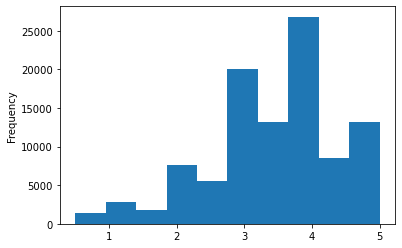

In [12]:
# notas['nota'] é o mesmo que notas.nota ; a partir de agora a segunda maneira será utilizada
notas.nota.plot(kind='hist') #plota um histograma dos dados da coluna nota.

<AxesSubplot:xlabel='nota'>

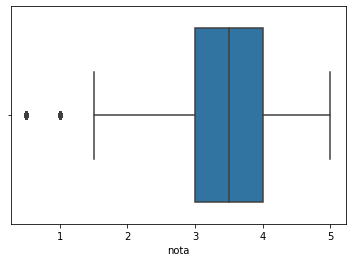

In [13]:
sns.boxplot(notas.nota) #apresenta os quartis de frequência dos dados. As notas inferiores a 1.5 são consideradas outliers.

# Analisando algumas notas específicas por filme

In [14]:
filmes = pd.read_csv('movies.csv') #importa os dados referente aos filmes avaliados.
filmes.columns = ['filmeID', 'titulo', 'generos'] #altera o nome das colunas para português
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
notas.query('filmeID==1').nota.mean() #seleciona as notas do filme com ID 1, no caso, Toy Story, e calcula sua média

3.9209302325581397

In [16]:
media_por_filme = notas.groupby('filmeID').mean().nota #agrupa as notas por filme e tira a média entre elas.
media_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

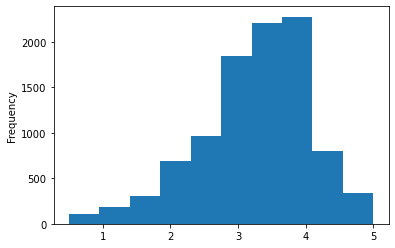

In [17]:
media_por_filme.plot(kind='hist') #plota o histograma das medias dos filmes do dataframe.

<AxesSubplot:ylabel='nota'>

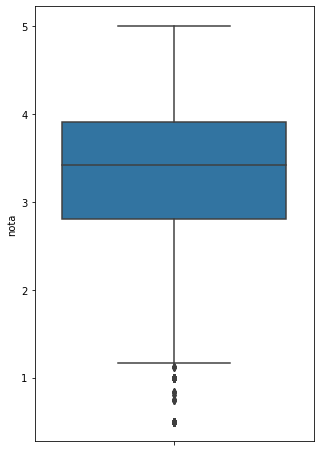

In [18]:
plt.figure(figsize=(5,8)) #formata o tamanho do gráfico.
sns.boxplot(y=media_por_filme) #plota verticalmente o boxplot com os quartis das medias das notas por filme.

<AxesSubplot:xlabel='nota', ylabel='Density'>

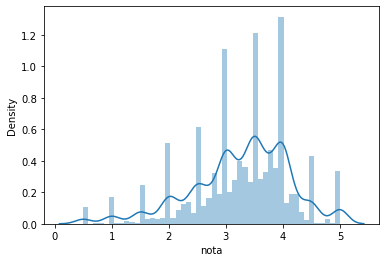

In [19]:
sns.distplot(media_por_filme, bins=50) #plota o histograma das medias dos filmes. bins é a quatidade de barras desejadas

In [20]:
media_por_filme.describe() #exibe algumas medidas de descrição dos dados.

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Text(0.5, 1.0, 'Histograma da média de notas dos filmes')

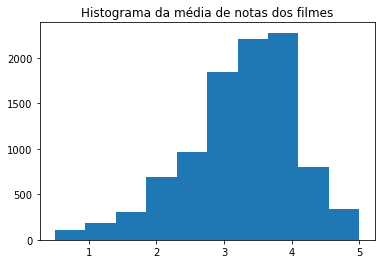

In [21]:
plt.hist(media_por_filme) #plota o histograma das medias dos filmes com o matplotlib.
plt.title('Histograma da média de notas dos filmes') #atribui um título para o histograma.

# Visualização de dados

Importando outro data set de filmes para trabalhar visualização

In [22]:
tmdb = pd.read_csv('tmdb_5000_movies.csv') #atribui as informações do csv a variável "tmdb".
tmdb.head() #exibe as 5 primeiras linhas do dataframe tmdb.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [23]:
tmdb.original_language.unique() # Exibe quais categorias diferentes entre si foram inseridos nesse atributo.

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

* Dados Categóricos

O atributo original_language (idioma original) é CATEGÓRICO NOMINAL, pois são categorias que não possuem ordenação.

Ensino fundamental, ensino médio, ensino superior; por exemplo, seria CATEGÓRICO ORDINAL, pois são categoria com ordenação.

* Dados Quantitativos

O atributo budget(orçamento) é QUANTITATIVO CONTÍNUO, pois os dados podem assumir qualquer valor.

O atributo vote_count(contagem de votos) é QUANTITATIVO DISCRETO, tal como as notas do primeiro data set (0,5; 1,0; 1,5; 2,0; 2,5; 3,0; 3,5; 4,0; 4,5; 5,0)

In [24]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
# Exibe a contagem de filmes por idioma original 
# Transforma a série (uma única coluna) em um data frame 
# Separa a contagem e a linguagem em duas colunas diferentes (além do índice).
# Atribui o data frame da contagem a variável contagem_de_lingua
contagem_de_lingua.columns = ['original_language', 'total'] # Renomeia o rótulo das colunas do data frame.
contagem_de_lingua.head() # Exibe as 5 primeiras instâncias desse data frame.

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

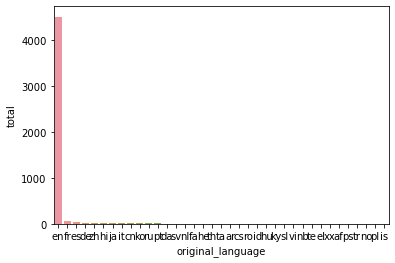

In [25]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_de_lingua) # Plota um gráfico de barras com o seaborn.

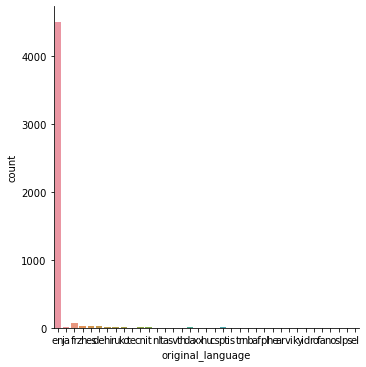

In [26]:
sns.catplot(x='original_language',kind='count',data=tmdb) # Outra forma, simplificada, de plotar um gráfico similar ao anterior.

([<matplotlib.patches.Wedge at 0x1848be197f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(

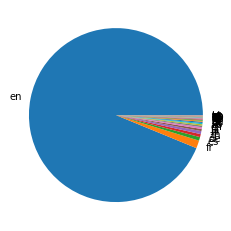

In [27]:
plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language) # Plota um gráfico de pizzas(não é recomendado usá-lo).

In [28]:
total_por_lingua = tmdb.original_language.value_counts() # Atribui a contagem de idiomas de tmdb à variável total_por_lingua.
total_geral = total_por_lingua.sum() # Soma todas as contagens dos idiomas e atribui à variável total_geral.
total_de_ingles = total_por_lingua.loc['en'] # Localiza a contagem do idioma inglês(en) e atribui à variável total_de_ingles.
total_do_resto = total_geral - total_de_ingles # Obtém a contagem total de todos os idiomas diferentes do inglês.
print('total de inglês = ',total_de_ingles, '; total de outros idiomas = ', total_do_resto) # Printa os valores.

total de inglês =  4505 ; total de outros idiomas =  298


<AxesSubplot:xlabel='lingua', ylabel='total'>

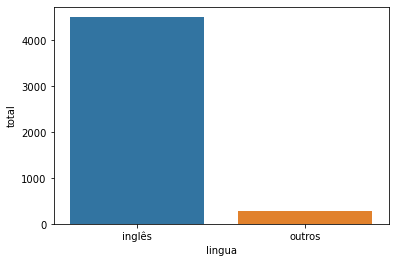

In [29]:
dados = { 
    'lingua' : ['inglês', 'outros'], # Configuração da coluna lingua
    'total' : [total_de_ingles, total_do_resto] # Configuração da coluna total
}
dados = pd.DataFrame(dados) # Organiza esses dados em um data frame.
sns.barplot(x = 'lingua', y = 'total', data = dados) # Plota o gráfico de barras comparando inglês e as demais linguas.

In [30]:
filmes_sem_ingles_ordem = tmdb.query("original_language != 'en'").original_language.value_counts() 
# Seleciona os idiomas diferentes de inglês e faz a contagem de ocorrência deles. Atribui a uma variável.
filmes_sem_ingles_ordem

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ro     2
ar     2
cs     2
ta     2
id     2
tr     1
pl     1
is     1
sl     1
ps     1
el     1
af     1
xx     1
ky     1
vi     1
nb     1
no     1
te     1
hu     1
Name: original_language, dtype: int64

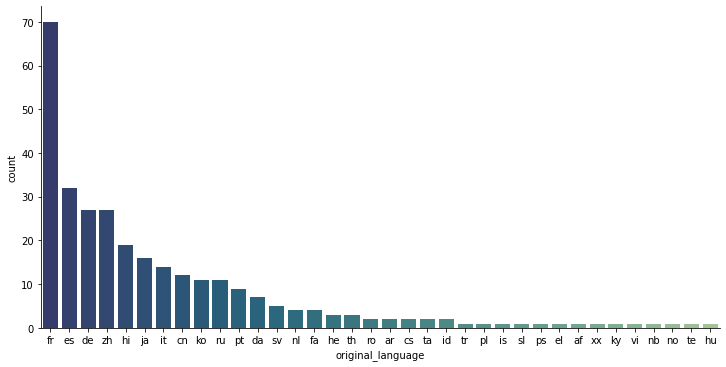

In [31]:
filmes_com_lingua_diferente_de_ingles = tmdb.query("original_language != 'en'") # Atribui os dados com idiomas diferentes do inglês à variável.
sns.catplot(x = 'original_language', # Plota um gráfico da categoria com os idiomas no eixo x.
            kind = 'count', # Define que os valores no gráfico serão da contagem de ocorrência dos idiomas.
            data = filmes_com_lingua_diferente_de_ingles, # Seleciona os dados a serem plotados. Idiomas sem o inglês.
            aspect = 2, # Altera a dimensão do gráfico
            palette = "crest_r", # Altera as cores das barras, vide documentação seaborn. _r ou _d muda a ordem das cores.
            order = filmes_sem_ingles_ordem.index) # Ordena os idiomas no gráfico.

# Análise Estatística

In [32]:
filmes.head(2) # Exibe dois filmes do primeiro data frame.

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [33]:
notas_do_toy_story = notas.query('filmeID == 1') # Seleciona os dados de notas apenas do filme Toy Story e atribui à variável.
notas_do_jumanji = notas.query('filmeID == 2') # Seleciona os dados de notas apenas do filme Jumanji e atribui à variável.
print('Qtde notas do Toy Story = ',len(notas_do_toy_story),'; Qtde notas do Jumanji = ', len(notas_do_jumanji)) # Imprime a qtde de notas de cada filme.

Qtde notas do Toy Story =  215 ; Qtde notas do Jumanji =  110


In [34]:
print('Nota média do Toy Story: {:.2f}'.format(notas_do_toy_story.nota.mean())) # Imprime a nota média do Toy Story com 2 casas decimais.
print('Nota média do Jumanji: {:.2f}'.format(notas_do_jumanji.nota.mean())) # Imprime a nota média do Jumanji com 2 casas decimais.

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [35]:
print('Mediana das notas do Toy Story: {:.2f}'.format(notas_do_toy_story.nota.median())) # Imprime a mediana da nota do Toy Story com 2 casas decimais.
print('Mediana das notas do Jumanji: {:.2f}'.format(notas_do_jumanji.nota.median())) # Imprime a mediana da nota do Jumanji com 2 casas decimais.

Mediana das notas do Toy Story: 4.00
Mediana das notas do Jumanji: 3.50


# Exemplo com dados fictícios de como a média e a mediana não representam a distribuição dos dados.

Média da nota do filme1 = 3.0 ; Média da nota do filme2 = 3.0
Mediana da nota do filme1 = 3.0 ; Mediana da nota do filme2 = 3.0
Desvio padrão da nota do filme1 = 0.5 ; Desvio padrão da nota do filme2 = 2.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

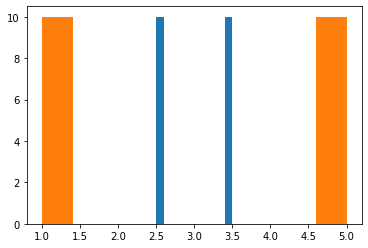

In [36]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print('Média da nota do filme1 = {}'.format(filme1.mean()),'; Média da nota do filme2 = {}'.format(filme2.mean()))
print('Mediana da nota do filme1 = {}'.format(np.median(filme1)),'; Mediana da nota do filme2 = {}'.format(np.median(filme2)))
print('Desvio padrão da nota do filme1 = {}'.format(np.std(filme1)),'; Desvio padrão da nota do filme2 = {}'.format(np.std(filme2)))
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1848c314460>,
 'caps': [<matplotlib.lines.Line2D at 0x1848c314b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1848c314100>,
 'medians': [<matplotlib.lines.Line2D at 0x1848c31f220>,
 'fliers': [<matplotlib.lines.Line2D at 0x1848c31f580>,
 'means': []}

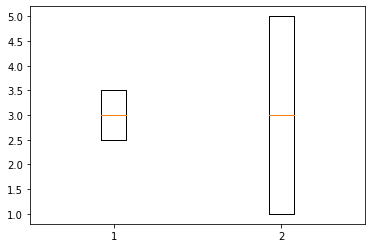

In [37]:
plt.boxplot([filme1, filme2])

# Voltando aos filmes Toy Story e Jumanji

{'whiskers': [<matplotlib.lines.Line2D at 0x1848c383af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1848c3901f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1848c3837f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1848c3908b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1848c390c40>,
 'means': []}

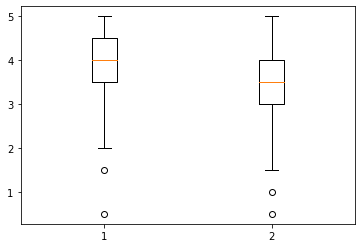

In [38]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot:xlabel='filmeID', ylabel='nota'>

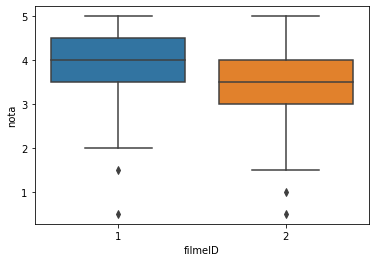

In [39]:
sns.boxplot(x = 'filmeID', y = 'nota', data = notas.query('filmeID in [1,2]'))

In [40]:
print('Desvio padrão da nota do Toy Story = {:.5f}'.format(np.std(notas_do_toy_story.nota)))
print('Desvio padrão da nota do Jumanji = {:.5f}'.format(np.std(notas_do_jumanji.nota)))

Desvio padrão da nota do Toy Story = 0.83292
Desvio padrão da nota do Jumanji = 0.87770
